In [37]:
import pandas as pd
import numpy as np
from sklearn import model_selection, preprocessing, linear_model, metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
df = pd.read_pickle('tweets.df')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49159 entries, 1 to 49159
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   label                 31962 non-null  float64
 1   tweet                 49159 non-null  object 
 2   clean_tweet           49159 non-null  object 
 3   tweet_token           49159 non-null  object 
 4   tweet_token_filtered  49159 non-null  object 
 5   tweet_stemmed         49159 non-null  object 
 6   tweet_lemmatize       49159 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.0+ MB


In [45]:
df_combined = df.loc[:, ['tweet_stemmed','tweet_lemmatize', 'label']]
df_train = df_combined.iloc[:31962]
df_valid = df_combined.iloc[31962:]

In [15]:
df_train.loc[:, ['label']] = df_train.loc[:, ['label']].astype(int)

/Users/kosmosivanov/PycharmProjects/nlp/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


#### Задание 1

In [ ]:
def train_model(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred = np.where(classifier.predict_proba(X_test)[:,1] > 0.33, 1, 0)
    return metrics.f1_score(y_test, y_pred)

##### TWEET_STEMMED count_vectorizer

In [20]:
count_vectorizer = CountVectorizer(analyzer='word', max_features=5000, )
count_vectorizer.fit(df_combined['tweet_stemmed'].map(lambda x: ' '.join(x)))

xtrain_count = count_vectorizer.transform(df_train['tweet_stemmed'].map(lambda x: ' '.join(x)))

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(xtrain_count, df_train['label'], test_size=0.33)

In [39]:
f1_score_ = train_model(linear_model.LogisticRegression(), X_train, X_test, y_train, y_test)
print(f1_score_)

0.6606875934230194


##### TWEET_LEMMATIZE count_vectorizer

In [46]:
count_vectorizer = CountVectorizer(analyzer='word', max_features=5000, )
count_vectorizer.fit(df_combined['tweet_lemmatize'].map(lambda x: ' '.join(x)))

xtrain_count = count_vectorizer.transform(df_train['tweet_lemmatize'].map(lambda x: ' '.join(x)))

In [47]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(xtrain_count, df_train['label'], test_size=0.33)

In [48]:
f1_score_ = train_model(linear_model.LogisticRegression(), X_train, X_test, y_train, y_test)
print(f1_score_)

0.6726726726726726


Задание 2

##### ##### TWEET_STEMMED tfidf_vectorizer

In [40]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', max_features=5000, )
tfidf_vectorizer.fit(df_combined['tweet_stemmed'].map(lambda x: ' '.join(x)))

xtrain_tfidf = tfidf_vectorizer.transform(df_train['tweet_stemmed'].map(lambda x: ' '.join(x)))

In [41]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(xtrain_tfidf, df_train['label'], test_size=0.33)

In [42]:
f1_score_ = train_model(linear_model.LogisticRegression(), X_train, X_test, y_train, y_test)
print(f1_score_)

0.6017094017094017


##### TWEET_LEMMATIZE tfidf_vectorizer

In [49]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', max_features=5000, )
tfidf_vectorizer.fit(df_combined['tweet_lemmatize'].map(lambda x: ' '.join(x)))

xtrain_tfidf = tfidf_vectorizer.transform(df_train['tweet_lemmatize'].map(lambda x: ' '.join(x)))

In [50]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(xtrain_tfidf, df_train['label'], test_size=0.33)

In [51]:
f1_score_ = train_model(linear_model.LogisticRegression(), X_train, X_test, y_train, y_test)
print(f1_score_)

0.5934455270150576


Задание 4

In [52]:
from wordcloud import WordCloud
import collections
import matplotlib.pyplot as plt

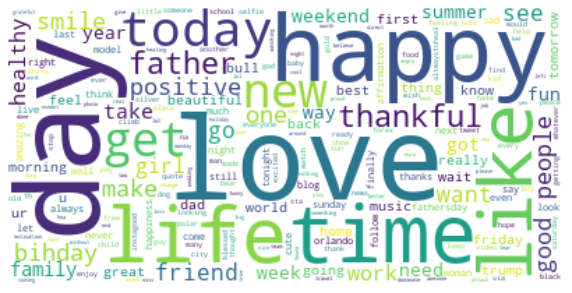

In [60]:
words = []
df_ = df_combined['tweet_lemmatize']
for line in df_combined['tweet_lemmatize']:
    words.extend(line)

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 #stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Задание 5

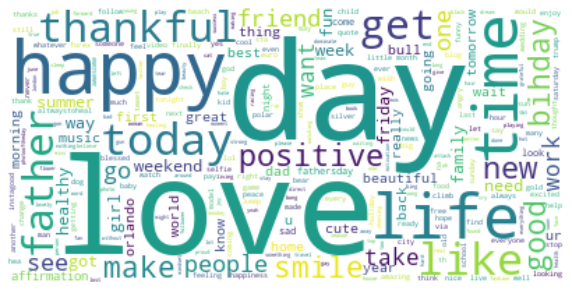

In [69]:
words = []
for line in (df_combined.loc[df_combined['label'] == 0, ['tweet_lemmatize']]).values:
    words.extend(line[0])

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 #stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Задание 6

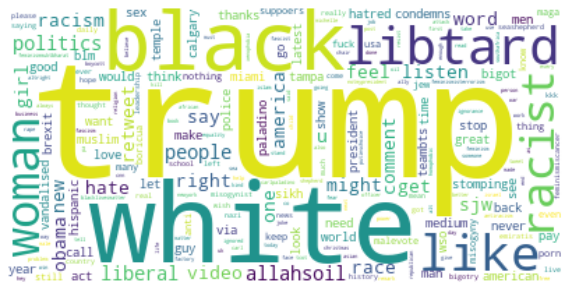

In [70]:
words = []
for line in (df_combined.loc[df_combined['label'] == 1, ['tweet_lemmatize']]).values:
    words.extend(line[0])

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 #stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()